In [1]:
%matplotlib inline
import numpy as np
import os, string
from matplotlib import pyplot as plt
import scipy as sp
import cv2

img = cv2.imread('camera.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,(0,0),fx=0.5,fy=0.5)
print(img.shape)
#plt.imshow(img,cmap='gray')
#plt.show()

(126, 126)


In [2]:
from __future__ import division
blurKernel = np.ones((3,3))/9
#print blurKernel

F:\Anaconda3\lib\site-packages\matplotlib\figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


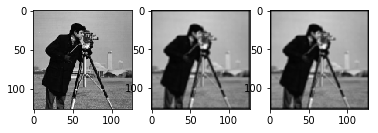

In [8]:
from scipy import signal#warning
blurImg = signal.convolve2d(img, blurKernel, 'same','symm')
blurImg1 = signal.convolve2d(img,blurKernel, 'full',boundary ='fill',fillvalue=0)
blurImg2 = signal.convolve2d(blurKernel, img, 'full',boundary ='fill',fillvalue=0)
fig = plt.figure()
ax = fig.add_subplot(131)  
ax.imshow(img,cmap='gray')
ax = fig.add_subplot(132)  
ax.imshow(blurImg1,cmap='gray')
ax = fig.add_subplot(133)  
ax.imshow(blurImg2,cmap='gray')
fig.show()

In [8]:
print(blurImg.shape,img.shape)

(126, 126) (126, 126)


$$argmin\frac{1}{2}(AX-B)+\lambda X \rightarrow X=(A^TA+\lambda I)^{-1}A^TB$$

$$A=\left[
 \begin{matrix}
   1/9 & 0 & 0 \\
   ... & 1/9 & ... \\
   0 & ... & 0
  \end{matrix}
  \right] $$

In [14]:
import itertools
ta=[1,2,3]
tb=[4,5,6]
#tc=[(i,j) for i,j in zip(ta,tb)]
#print tc
#import itertools
#for i in itertools.product('ABCD', repeat = 2):
#    print i,

for i in itertools.product(range(1,4),range(4,7)):#dikaer product
    print(i,)
print(' ')
a=np.arange(10)
print(a)
a[ta]*=2
print(a)

(1, 4)
(1, 5)
(1, 6)
(2, 4)
(2, 5)
(2, 6)
(3, 4)
(3, 5)
(3, 6)
 
[0 1 2 3 4 5 6 7 8 9]
[0 2 4 6 4 5 6 7 8 9]


In [10]:
from scipy.sparse import csc_matrix
from scipy.sparse import linalg as sppl
import numpy.linalg
test = csc_matrix((4,3))
test[0:2,0:2]=np.random.randn(test[0:2,0:2].shape[0],test[0:2,0:2].shape[1])
test[2:4,2:3]=np.random.randn(test[2:4,2:3].shape[0],test[2:4,2:3].shape[1])
print(test)
#testa = test.toarray()
#print testa
tt = csc_matrix(np.random.randn(3,4))
#tRes = np.mat(csc_matrix.dot(test,tt))
tRes = csc_matrix.dot(test,tt)
print(tRes)

  (0, 0)	-0.852415105065
  (1, 0)	0.629021511421
  (0, 1)	-0.0387286029948
  (1, 1)	-0.432879490409
  (2, 2)	0.507297335807
  (3, 2)	-0.6354113776
  (3, 0)	0.107660463114
  (2, 0)	-0.0859535539253
  (1, 0)	0.0799991053937
  (0, 0)	0.421438669678
  (3, 1)	-0.978647618536
  (2, 1)	0.781328989499
  (1, 1)	0.0629458629797
  (0, 1)	1.13007294663
  (3, 2)	-0.382632298456
  (2, 2)	0.305484529303
  (1, 2)	1.45139241799
  (0, 2)	-0.461897163505
  (3, 3)	0.589420890289
  (2, 3)	-0.470579624245
  (1, 3)	-0.585337052422
  (0, 3)	0.251650949651


F:\Anaconda3\lib\site-packages\scipy\sparse\compressed.py:730: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


In [8]:
A=csc_matrix(((img.shape[0]-3)*(img.shape[1]-3),img.shape[0]*img.shape[1]))
print(A.shape)
ind = -1
for j in xrange(0,np.int32(img.shape[1])-3):
    for i in xrange(0,np.int32(img.shape[0])-3):
        ind +=1
        #index=[]
        ravel = []
        for e in itertools.product(range(j,j+3),range(i,i+3)):
            #index.append(e)
            ravel.append(e[1]+e[0]*img.shape[0])
        A[ind,[ravel]]=1./9.
        #print ravel,A[ind,:]

(15129, 15876)


In [147]:
from scipy import sparse
reg = 0.001
X = A.T.dot(A)
X=X+reg*sparse.eye(X.shape[0])
print(X.shape)
Xinv = sp.sparse.linalg.inv(X)
print(Xinv.shape)

(15876, 15876)
(15876, 15876)


In [148]:
X=csc_matrix.dot(csc_matrix(Xinv), A.T)
padBlur = csc_matrix(blurImg[0:np.int32(img.shape[0])-3,0:np.int32(img.shape[1])-3].ravel()).T
print(X.shape,padBlur.shape)
X=csc_matrix.dot(X,padBlur)
print(X.shape)

(15876, 15129) (15129, 1)
(15876, 1)


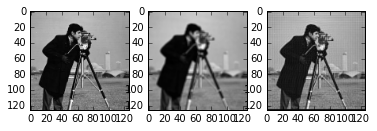

In [149]:
res=X.todense()
res = res.reshape(blurImg.shape)
fig = plt.figure()
ax = fig.add_subplot(131)  
ax.imshow(img,cmap='gray')
ax = fig.add_subplot(132)  
ax.imshow(blurImg,cmap='gray')
ax = fig.add_subplot(133)  
ax.imshow(res,cmap='gray')
plt.show()

[[ 0.04  0.04  0.04  0.04  0.04]
 [ 0.04  0.04  0.04  0.04  0.04]
 [ 0.04  0.04  0.04  0.04  0.04]
 [ 0.04  0.04  0.04  0.04  0.04]
 [ 0.04  0.04  0.04  0.04  0.04]]
(252, 252)


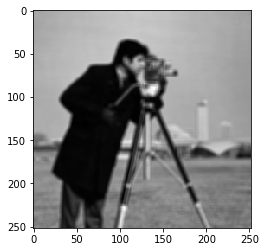

(61009, 63504)
 now : 246 of 247A2 complete


In [16]:
from scipy.sparse import csc_matrix,lil_matrix
from scipy.sparse import linalg as sppl
import numpy.linalg
from scipy import sparse
import cv2
import sys,time
from __future__ import division
from scipy import signal#warning
dia = 5
blurKernel = np.ones((dia,dia))/(dia**2)
print(blurKernel)
img2 = cv2.imread('camera.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
#img2 = cv2.resize(img2,(0,0),fx=0.2,fy=0.2)
print(img2.shape)
blurImg2 = signal.convolve2d(img2, blurKernel, 'same','symm')
plt.imshow(blurImg2,cmap='gray')
plt.show()
A2=lil_matrix(((img2.shape[0]-dia)*(img2.shape[1]-dia),img2.shape[0]*img2.shape[1]))
print(A2.shape)
ind = -1
for j in range(0,np.int32(img2.shape[1])-dia):
    sys.stdout.write('\r now : %d' % j +' of %d'%(np.int32(img2.shape[1])-dia))
    sys.stdout.flush()
    time.sleep(0.2)
    for i in range(0,np.int32(img2.shape[0])-dia):
        ind +=1
        #index=[]
        ravel = []
        for e in itertools.product(range(j,j+dia),range(i,i+dia)):
            #index.append(e)
            ravel.append(e[1]+e[0]*img2.shape[0])
        A2[ind,[ravel]]=1./(dia**2)
        #print ravel,A[ind,:]
A2 = csc_matrix(A2)
print 
print('A2 complete')

$X_{k+1}=X_{k}-\mu[(A^TA+\lambda I)X_k-A^TB]$

In [20]:
lr=0.7
reg = 0.01
rad = np.int32((dia-1) / 2)
print(rad,np.int32(img2.shape[0]-rad))
padBlur2 = csc_matrix(blurImg2[rad:np.int32(img2.shape[0])-rad-1,rad:np.int32(img2.shape[1])-rad-1].ravel()).T
print(A2.shape,padBlur2.shape,blurImg2.shape)
Xi = np.mat(np.random.randn(img2.shape[0],img2.shape[1]).ravel()).T
print(Xi.shape)
epoch = 200
oldloss = 100000000
newloss = 0
for i in range(0,epoch):
    delta = A2.T.dot(A2)
    delta=delta+reg*sparse.eye(delta.shape[0])
    delta=csc_matrix.dot(csc_matrix(delta), csc_matrix(Xi))
    delta-=A2.T.dot(padBlur2)
    delta *= lr
    Xi -= delta
    if (i > 0 and np.mod(i,25) == 0) or i==epoch - 1:
        newloss = np.sum(np.abs(Xi.reshape(img2.shape)-img2))
#         ratio = (oldloss - newloss)/newloss
#         if ratio < 0.:
#             lr *= 0.5
#         elif ratio < 0.2:
#             lr *= 1.3
#         elif ratio < 0.3:
#             lr *= 1.5
#         oldloss = newloss
        print(i,lr,newloss)
print('optimization complete')

2 250
(61009, 63504) (61009, 1) (252, 252)
(63504, 1)
25 0.7 649204.921277
50 0.7 606654.128268
75 0.7 585462.209581
100 0.7 572517.747845
125 0.7 563944.838238
150 0.7 557971.254735
175 0.7 553668.890764
199 0.7 550614.812536
optimization complete


(63504, 1) (252, 252)


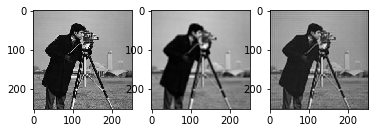

In [21]:
res=Xi#.todense()
print(Xi.shape,img2.shape)
res = res.reshape(img2.shape)
# fig = plt.figure()
# plt.imshow(img2,cmap='gray')
# fig = plt.figure()
# plt.imshow(blurImg2,cmap='gray')
# fig = plt.figure()
# plt.imshow(res,cmap='gray')
fig = plt.figure()
ax = fig.add_subplot(131)  
ax.imshow(img2,cmap='gray')
ax = fig.add_subplot(132)  
ax.imshow(blurImg2,cmap='gray')
ax = fig.add_subplot(133)  
ax.imshow(res,cmap='gray')
plt.show()